# Importing Required Libraries and Modules

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

In [3]:
train_data_dir = 'Aug_Img_Dataset/training_set'
validation_data_dir = 'Aug_Img_Dataset/test_set'

In [4]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

Found 1200 images belonging to 3 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 120 images belonging to 3 classes.


In [7]:
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

# Applying Adam Optimizer

In [24]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.0025)

In [25]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_19 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)       

In [26]:
import pydot
import graphviz

In [27]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [28]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

# Using Callbacks (Checkpoint,Early Stopping and ReduceLROnPlateau)

In [29]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_Adam132')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsAdam1.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-4)
 

# Running and saving the Model

In [30]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesAdam1.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 74s 4s/step - loss: 1.0971 - accuracy: 0.3542 - val_loss: 1.0952 - val_accuracy: 0.5500
Epoch 2/20
18/18 [==============================] - 72s 4s/step - loss: 1.0943 - accuracy: 0.3576 - val_loss: 1.0911 - val_accuracy: 0.4167
Epoch 3/20
18/18 [==============================] - 73s 4s/step - loss: 1.0898 - accuracy: 0.3646 - val_loss: 1.0730 - val_accuracy: 0.3917
Epoch 4/20
18/18 [==============================] - 72s 4s/step - loss: 1.0645 - accuracy: 0.4271 - val_loss: 1.0781 - val_accuracy: 0.4083
Epoch 5/20
18/18 [==============================] - 74s 4s/step - loss: 1.0474 - accuracy: 0.4167 - val_loss: 0.9850 - val_accuracy: 0.5083
Epoch 6/20
18/18 [==============================] - 75s 4s/step - loss: 1.0300 - accuracy: 0.4410 - val_loss: 0.9707 - val_accuracy: 0.6250
Epoch 7/20
18/18 [==============================] - 74s 4s/step - loss: 0.9999 - accuracy: 0.4618 - val_loss: 0.8335 - val_accuracy: 0.6667
Epoch 8/20
18/18 [==

# Adjusting Learning Rate from .001 to .01

In [31]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.01)

In [32]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_25 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 32)       

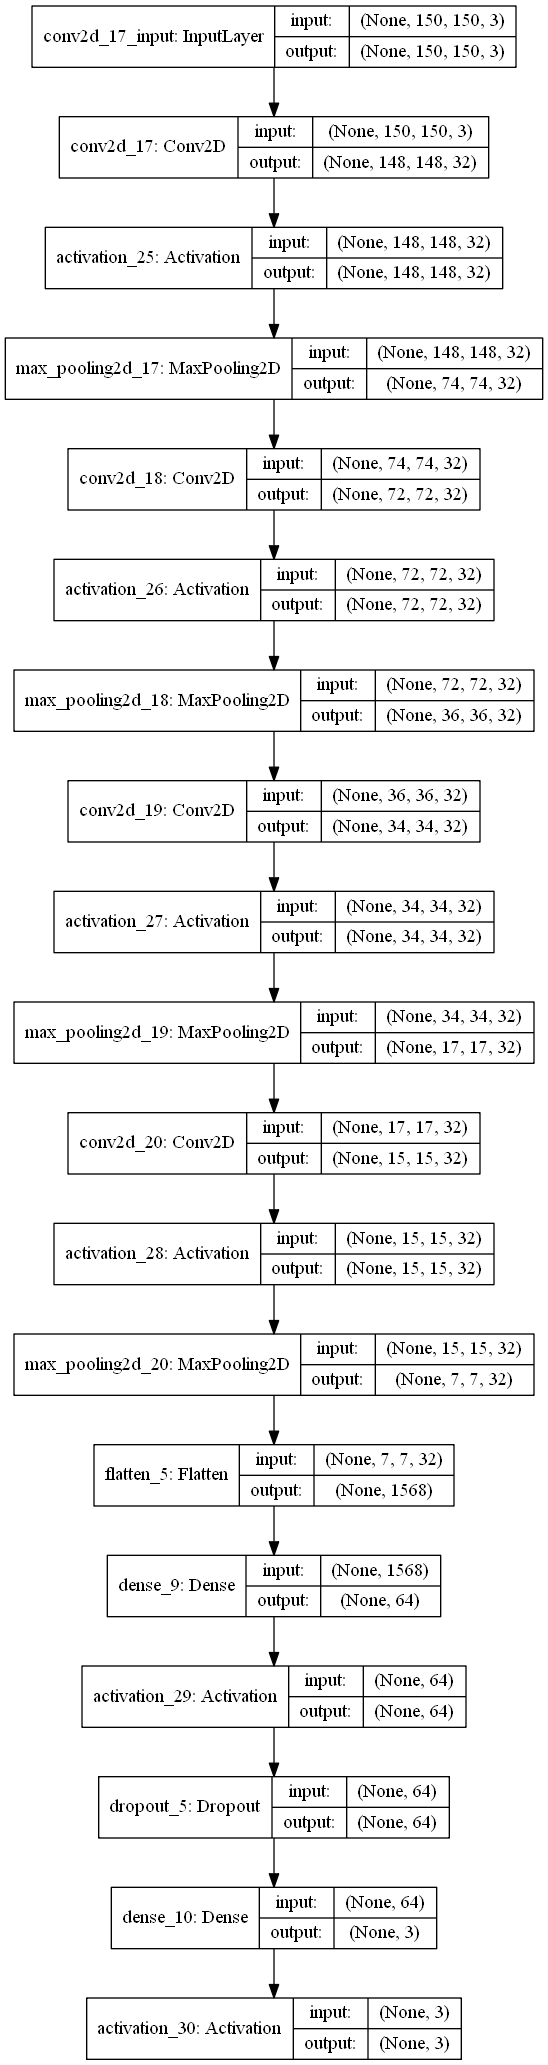

In [33]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [34]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

In [35]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_Adam2')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightAdam2.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-4)

In [36]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesAdam2.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 76s 4s/step - loss: 1.3376 - accuracy: 0.3299 - val_loss: 1.1075 - val_accuracy: 0.3333
Epoch 2/20
18/18 [==============================] - 75s 4s/step - loss: 1.1063 - accuracy: 0.2812 - val_loss: 1.0974 - val_accuracy: 0.3333
Epoch 3/20
18/18 [==============================] - 80s 4s/step - loss: 1.1004 - accuracy: 0.3333 - val_loss: 1.1262 - val_accuracy: 0.3333
Epoch 4/20
18/18 [==============================] - 75s 4s/step - loss: 1.1021 - accuracy: 0.2639 - val_loss: 1.1028 - val_accuracy: 0.3333
Epoch 5/20
18/18 [==============================] - 76s 4s/step - loss: 1.1004 - accuracy: 0.2778 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 6/20
18/18 [==============================] - 73s 4s/step - loss: 1.0976 - accuracy: 0.3160 - val_loss: 1.1002 - val_accuracy: 0.3333
Epoch 7/20
18/18 [==============================] - 75s 4s/step - loss: 1.1014 - accuracy: 0.3264 - val_loss: 1.1055 - val_accuracy: 0.3333
Epoch 8/20
18/18 [==